In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [12]:
#read in the csv's
df_analyst=pd.read_csv('data_analyst.csv')
df_scientist = pd.read_csv('data_scientist.csv')
#strips dollar sign/ cleans the salary column
def f(x):
    x= x.strip("$")
    x= x.replace(',','')
    return x
df_scientist.loc[~df_scientist["Salary"].isna(),"Salary"]=df_scientist.loc[~df_scientist['Salary'].isna(),'Salary'].map(f)
df_scientist['Salary']= df_scientist['Salary'].astype(float)
df_scientist.head()

,Languages,Salary,Machine Learning,Education,Benefits,Experience,url,Type
0,5,144500.0,Yes,PhD,No,1.0,https://www.linkedin.com/jobs/view/3480836400/...,Scientist
1,2,144500.0,Yes,Unspecified,Yes,0.0,https://www.linkedin.com/jobs/view/3482317582/...,Scientist
2,1,144500.0,Yes,Master,No,0.0,https://www.linkedin.com/jobs/view/3485598972/...,Scientist
3,4,144500.0,Yes,PhD,Yes,0.0,https://www.linkedin.com/jobs/view/3474104997/...,Scientist
4,4,144500.0,Yes,Unspecified,No,1.0,https://www.linkedin.com/jobs/view/3499243413/...,Scientist


In [13]:
#combine the two pd dataframes
df = pd.concat([df_analyst.reset_index(drop=True), df_scientist.reset_index(drop=True)], axis=0,ignore_index=True)

df_plot=df #just in case to compare with original combined df
del df_plot[df_plot.columns[0]] #delete index column
df_plot.head()

,Languages,Salary,Machine Learning,Education,Benefits,Experience,url,Type
0,2,96955.0,No,Master,Yes,1.0,https://www.linkedin.com/jobs/view/3249211510/...,Analyst
1,6,96955.0,No,Master,No,1.0,https://www.linkedin.com/jobs/view/3487242175/...,Analyst
2,4,96955.0,No,Bachelor,Yes,1.0,https://www.linkedin.com/jobs/view/3505418682/...,Analyst
3,0,96955.0,No,Unspecified,No,2.0,https://www.linkedin.com/jobs/view/3498974602/...,Analyst
4,6,96955.0,No,Unspecified,No,5.0,https://www.linkedin.com/jobs/view/3508607089/...,Analyst


In [23]:
#factorize the string levels of education, ml, and benefits
df_plot['Machine Learning'] = pd.factorize(df_plot['Machine Learning'])[0]
df_plot['Education'] = pd.factorize(df_plot['Education'])[0]
df_plot['Benefits'] = pd.factorize(df_plot['Benefits'])[0]
#get rid of original na's
df_plot = df_plot.loc[df['Salary'] != 96955.0]
df_plot = df_plot.loc[df['Salary'] != 144500.0]
print(len(df_plot))

32


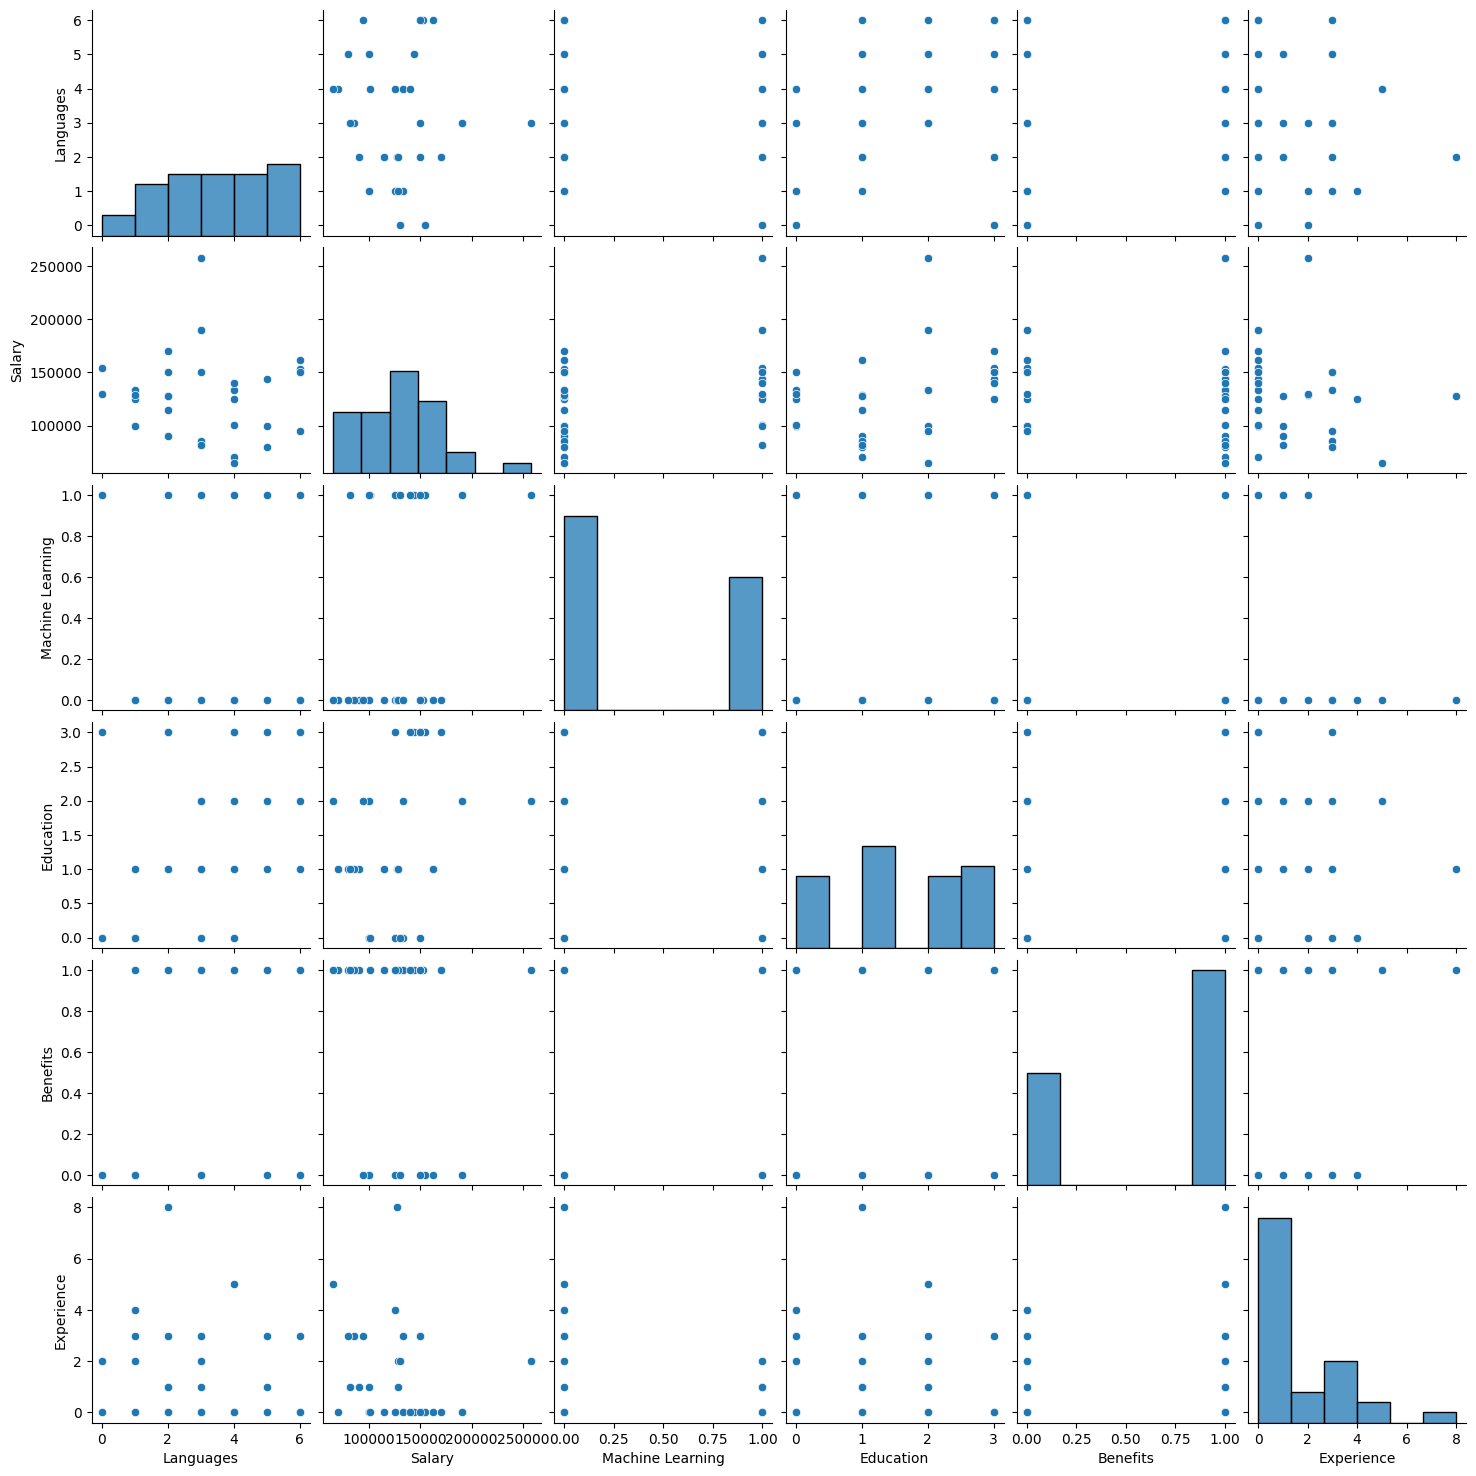

In [24]:
#pairs
sns.pairplot(df_plot) 

In [25]:
#summary statistics from both roles combined
df_plot[["Salary", "Languages","Experience"]].describe() #tabled version

,Salary,Languages,Experience
count,32.000000,32.000000,32.000000
mean,128836.656250,3.062500,1.406250
std,40267.796182,1.776867,1.898376
min,65000.000000,0.000000,0.000000
25%,100000.000000,2.000000,0.000000
50%,128350.000000,3.000000,0.500000
75%,150000.000000,4.000000,3.000000
max,258000.000000,6.000000,8.000000


<AxesSubplot: >

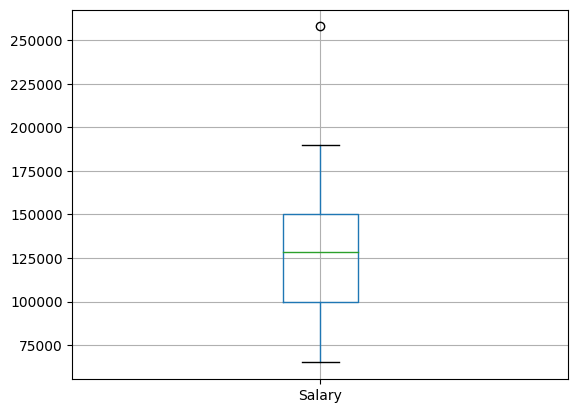

In [29]:
#boxplots of both roles
df_plot.boxplot("Salary")

<AxesSubplot: >

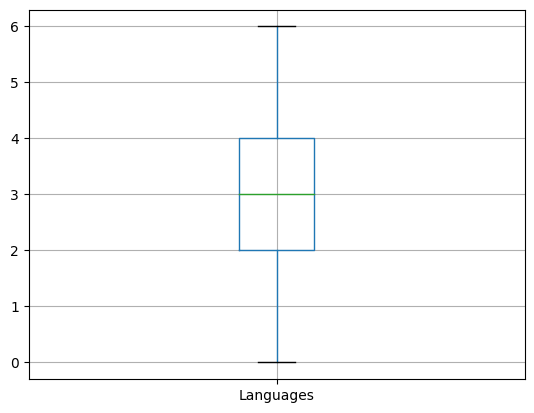

In [30]:
df_plot.boxplot("Languages")


<AxesSubplot: >

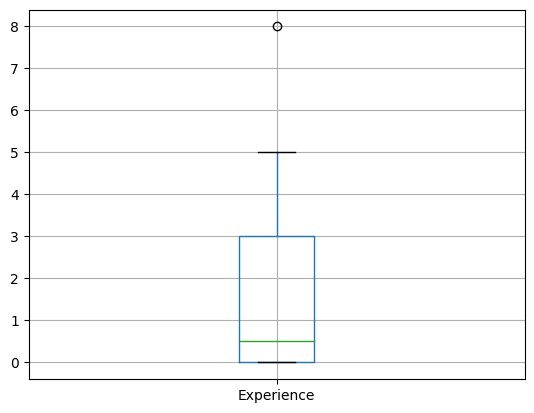

In [31]:
df_plot.boxplot("Experience")

<AxesSubplot: xlabel='Experience', ylabel='Salary'>

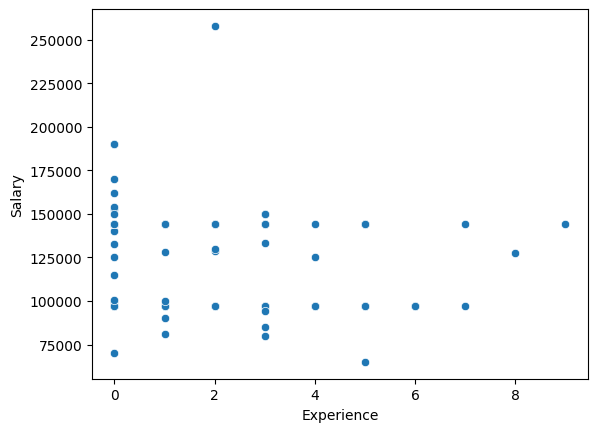

In [33]:
#scatterplot of both roles
sns.scatterplot(df,x = 'Experience', y='Salary')

<AxesSubplot: xlabel='Experience', ylabel='Salary'>

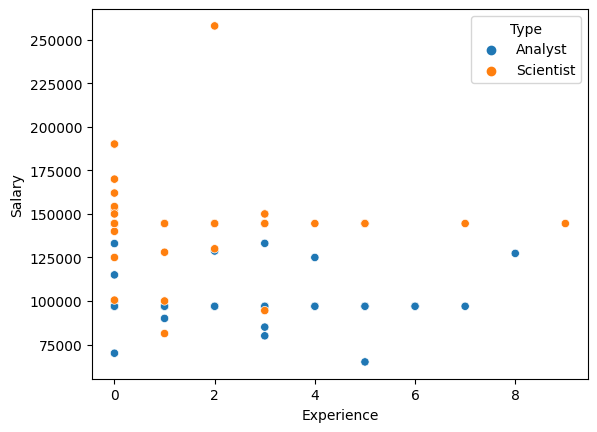

In [34]:
#scatter of the two roles separately
sns.scatterplot(df,x = 'Experience', y='Salary', hue="Type")

<AxesSubplot: xlabel='Machine Learning', ylabel='Salary'>

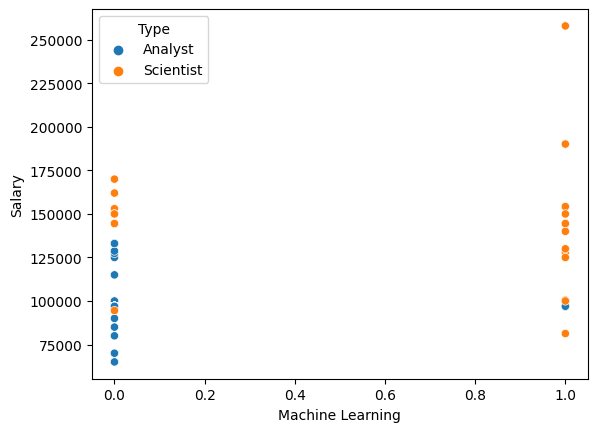

In [36]:
sns.scatterplot(df,x = 'Machine Learning', y='Salary', hue="Type")

<AxesSubplot: xlabel='Machine Learning', ylabel='Experience'>

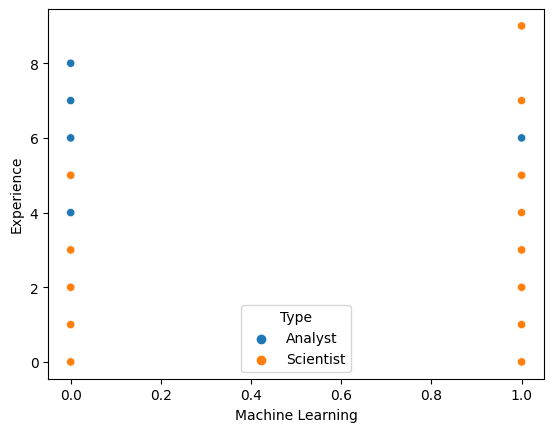

In [37]:
sns.scatterplot(df,x = 'Machine Learning', y='Experience', hue="Type")

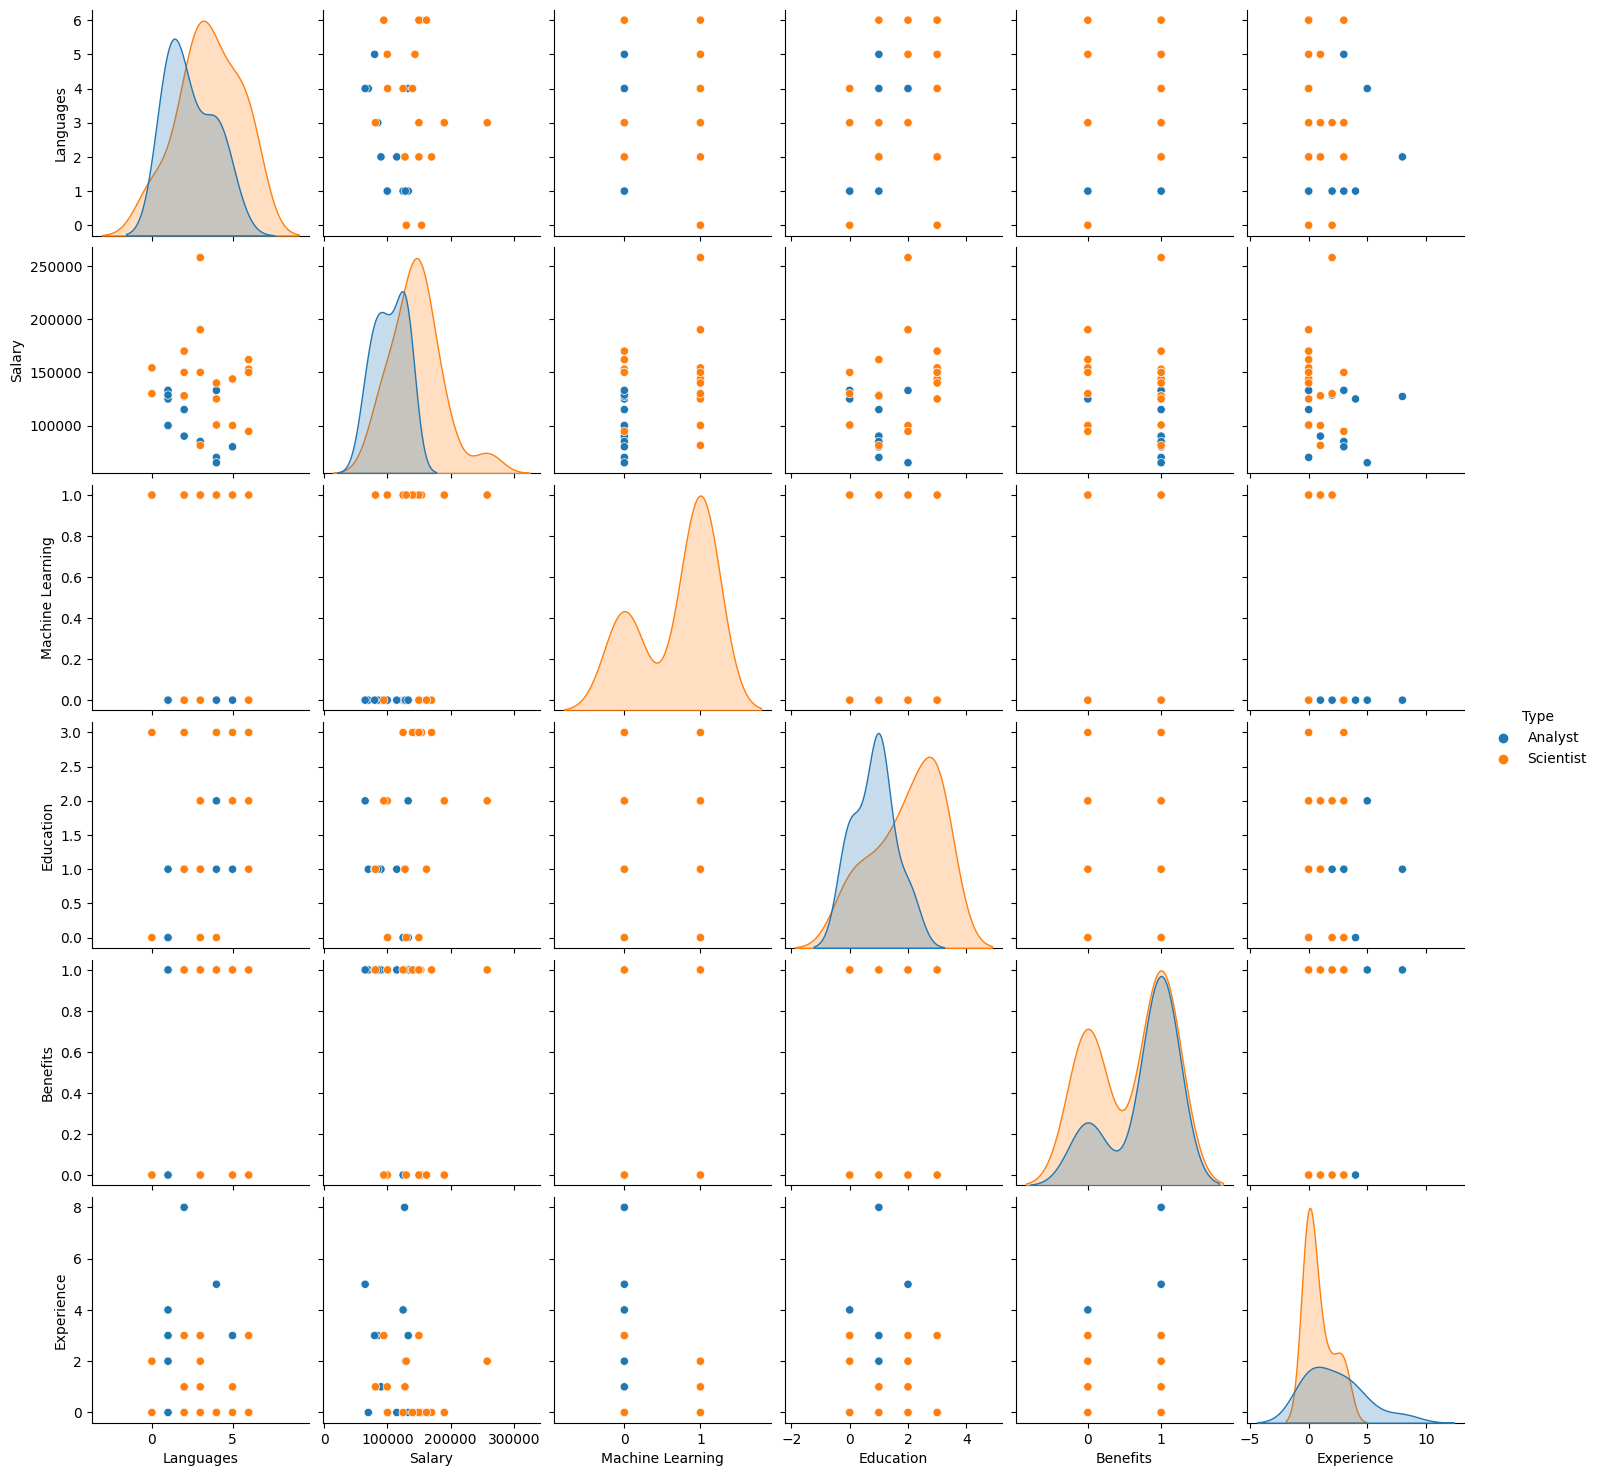

In [35]:
sns.pairplot(df_plot, hue="Type") 